In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd 
import matplotlib 
import matplotlib.pyplot as plt
import altair as alt
#from shapely.geometry import Point
#from geopandas import GeoDataFrame
import sys
import seaborn as sns
import geoplot as gplt
import geoplot.crs as gcrs
from IPython.display import display_html 

In [2]:
#load 311 data 1 for this year and one for last year: 

data20 = pd.read_csv('311_March_April2020.csv')

#load 2019 data 

data19 = pd.read_csv('311_March-April2019.csv')

C:\Users\James\Anaconda3\envs\geopandas\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (31,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\James\Anaconda3\envs\geopandas\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8,17,31,32,34,35,36,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#your code... 
dohmh_19 = data19[data19['Agency']=='DOHMH']
dohmh_20 = data20[data20['Agency']=='DOHMH']

In [4]:
new_dohmh_19 = dohmh_19[dohmh_19['Latitude'].notnull()]
new_dohmh_20 = dohmh_20[dohmh_20['Latitude'].notnull()]

In [5]:
dohmh_complaints_19 = new_dohmh_19.groupby(['Complaint Type']).count()
dohmh_complaints_19 = dohmh_complaints_19.reset_index()
dohmh_complaints_20 = new_dohmh_20.groupby(['Complaint Type']).count()
dohmh_complaints_20 = dohmh_complaints_20.reset_index()

In [6]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(
    new_dohmh_19, geometry=gpd.points_from_xy(x=new_dohmh_19.Longitude, y=new_dohmh_19.Latitude)
)

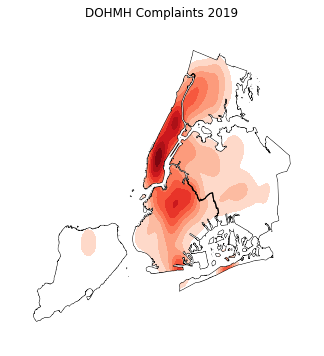

In [7]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
#collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.kdeplot(gdf, cmap='Reds', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)
ax.set_title("DOHMH Complaints 2019")
plt.show()

In [8]:
crs = {'init': 'epsg:4326'}
gdf_20 = gpd.GeoDataFrame(
    new_dohmh_20, geometry=gpd.points_from_xy(x=new_dohmh_20.Longitude, y=new_dohmh_20.Latitude)
)

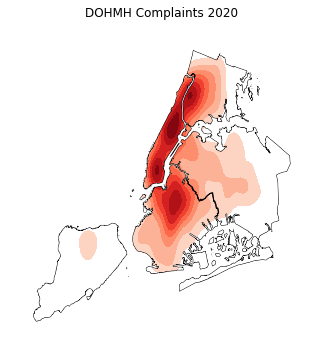

In [9]:
ax = gplt.kdeplot(gdf_20, cmap='Reds', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)
ax.set_title("DOHMH Complaints 2020")
plt.show()

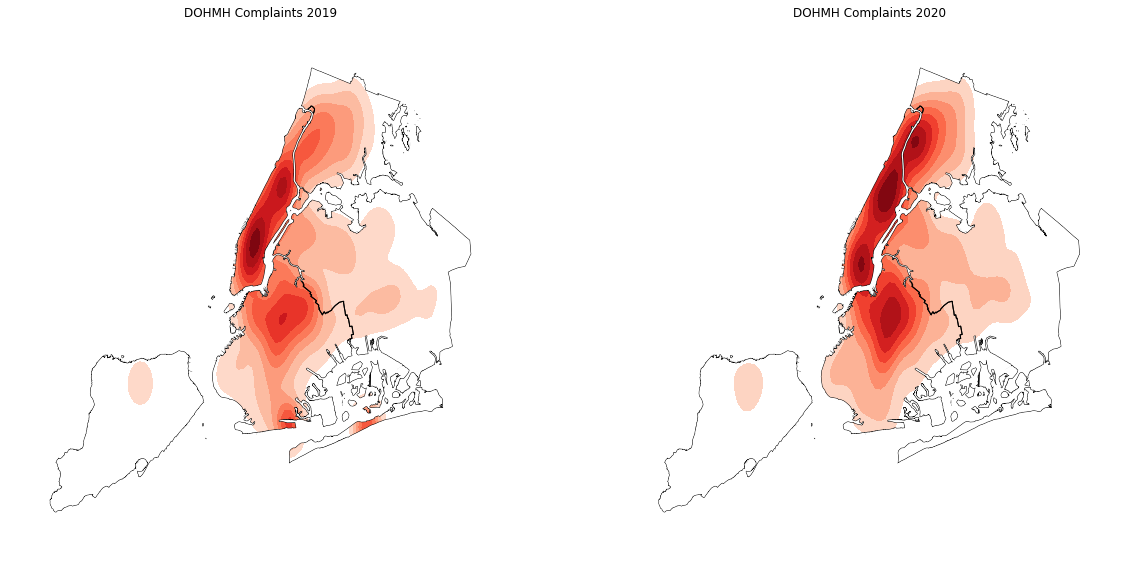

In [10]:
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))



proj = gcrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059)
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot(121, projection=proj)
ax2 = plt.subplot(122, projection=proj)

gplt.kdeplot( gdf,
    cmap='Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    clip=nyc_boroughs.geometry,
    ax=ax1
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax1)
ax1.set_title("DOHMH Complaints 2019")

gplt.kdeplot( gdf_20,
    cmap = 'Reds',
    projection=proj,
    shade=True, shade_lowest=False,
    clip=nyc_boroughs.geometry,
    ax=ax2
)
gplt.polyplot(nyc_boroughs, zorder=1, ax=ax2)
ax2.set_title("DOHMH Complaints 2020")
plt.show()


When observing both graphs side by side, one can conclude that complaints ticked up in brooklyn since 2019. Also, there seems to
be a high volum of complaints in 2020 in the upper side of manhatten. Also, ROCKAWAY PARK, complaints seems to be down in 
March and April of 2020 as comparied to 2019. 



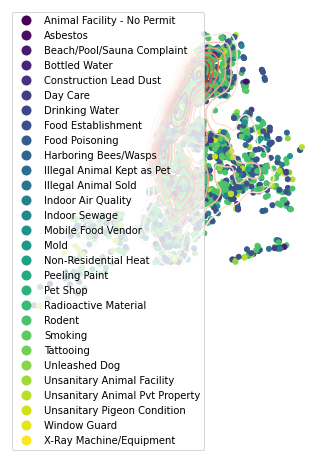

In [11]:
ax = gplt.kdeplot(gdf_20,projection=gcrs.AlbersEqualArea(), cmap='Reds')
gplt.pointplot(gdf_20, hue='Complaint Type', legend=True, ax=ax)